# Спринт 7. Машинное обучение. Часть 1

В этом спринте мы разберемся с основами машинного обучения (курс изначально посвящен backend-разработке, поэтому углубленного погружения в сферу датасаинс не будет).

В первой части спринта мы поговорим о следующих вещах:
- работа в jupyter-notebook (в котором кстати и написан этот документ);
- работа с многомерными структурами данных с помощью numpy;
- загрузка, анализ и предварительная обработка данных с помощью pandas; изучение структур данных;
- визуализация зависимостей в данных с помощью matplotlib и seaborn.

## Подготовка окружения. Введение в Jupyter Notebook

Про Jupyter Notebook говорилось несколько слов во 2 спринте, но в рамках этого спринта мы полноценно его изучим. Безсуловно, мы могли бы выполнять задания и изучать машинное обучение в Google Colab (как это делают студенты), но прикладной аспект применения моделей машинного обучения в нашей компании заключается в том, что наши специалисты используют локально развернутый Jupyter Notebook для того, чтобы проводить эксперименты и делать модели. Когда модель готова, она сериализуется на диск и в последствии используется.

Для начала работы необходимо подготовить виртуальное окружение, в котором должны быть установлены следующие зависимости:
- notebook (это Jupyter Notebook, среда для интерактивной разработки в браузере)
- pandas (пакет для работы со структурированными данными)
- matplotlib (самый популярный пакет для визуализации зависимостей в данных)
- seaborn (расширение для пакета matplotlib)

Вместе с этими зависимостями в окружение также автоматически установится пакет numpy - библиотека для выполнения производительных операций с многомерными структурами данных.

Для запуска Jupyter Notebook в браузере необходимо выполнить в окружении команду <b>jupyter-notebook</b>. После этого среда разработки откроется в браузере. Теперь можно начинать изучение машинного обучения!

## Numpy и операции с многомерными структурами данных

Начнем со скучной математики. В основе работы моделей машинного обучения лежит линейная алгебра и работа с многомерными объектами (потому что данные в конечном виде представляют собой многомерные массивы). В связи с этим совершенно понятно, почему библиотека numpy является базой для всех инструментов машинного обучения. Библиотека вводит новый тип данных - многомерный массив. Он очень похож на обычный список в Python, однако оптимизирован для выполнения математических операций. Библиотека достаточно большая, нам достаточно будет посмотреть, что из себя представляют многомерные массивы и как мы можем с ними работать.

In [1517]:
import numpy as np

In [1518]:
# это обычный список
l = [1, 2, 3, 4]
print(l)
# а это массив (пока одномерный)
a = np.array(l)
print(a)

[1, 2, 3, 4]
[1 2 3 4]


In [1519]:
type(l), type(a)

(list, numpy.ndarray)

In [1520]:
# возможность обращения по индексу и слайсы присутствуют
a[-1], a[2], a[1:-1]

(4, 3, array([2, 3]))

In [1521]:
# а вот теперь начинается магия...
b = a.reshape((2,2))
b

array([[1, 2],
       [3, 4]])

In [1522]:
b.reshape((4,1))

array([[1],
       [2],
       [3],
       [4]])

Мы в любой момент можем изменить размерность массива - ничто не мешает переходить от четырехмерных массивов к одномерным.

In [1523]:
# так мы можем сгенерировать числа по порядку от 1 до 41 (не включая), после чего создать из этого дела матрицу
a = np.arange(1, 41).reshape((4, 10))
a

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]])

In [1524]:
# а еще numpy умеет сам определять одну из размерностей, если указана другая
# либо если указаны все, кроме одной - для многомерного случая
a.reshape((10, -1))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24],
       [25, 26, 27, 28],
       [29, 30, 31, 32],
       [33, 34, 35, 36],
       [37, 38, 39, 40]])

In [1525]:
# можем создать трехмерный массив из нулей
np.zeros((2, 3, 4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [1526]:
# можем - двумерный из единиц
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [1527]:
# можем легко производить вычисления
b = ((b * 5.5 - 3.2) / 3) ** 3
b

array([[  0.45062963,  17.576     ],
       [ 87.1347037 , 246.09896296]])

In [1528]:
# можем вставлять вложенные массивы (с указанием оси и индекса)
# в данном случае вставляем строку (axis=0), вставляем в начало (индекс 0)
np.insert(b, 0, [1, 2], axis=0)

array([[  1.        ,   2.        ],
       [  0.45062963,  17.576     ],
       [ 87.1347037 , 246.09896296]])

In [1529]:
# можем удалять вложенные массивы (с указанием оси и индекса)
# в данном случае удалим последний столбец
np.delete(b, 1, axis=1)

array([[ 0.45062963],
       [87.1347037 ]])

И это далеко не все, что может библиотека numpy. Там есть множество полезных функций, в том числе связанных с псевдослучайными числами, со статистикой и линейной алгеброй. Что-то из этого вам в любом случае пригодится, если вы будете серьезно погружаться в ML.

## Pandas и его структуры данных

Чаще всего нам приходится работать с так называемыми структурированными данными - это данные, представленные в виде таблиц. Эффективным инструментом для работы с такими данными является библиотека pandas, которая вводит две структуры данных - DataFrame (по сути таблица) и Series (аналог ассоциативного массива - доступ к элементам такого массива выполняется по некоторому ключу). Данные в столбцах таблицы (DataFrame) представляются структурой Series.

Для начала мы научимся работать с описанными структурами данных

### Series

In [1530]:
import pandas as pd

In [1531]:
# создадим структуру Series
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [1532]:
# Series как правило создается на основе некоторой последовательности (списка)
# по умолчанию в качестве ключей используются числа от 0 до n (n - длина последовательности)
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [1533]:
# можем в любой момент получить только значения (тип данных всегда - массив numpy; какой сюрприз)
my_series.values

array([ 5,  6,  7,  8,  9, 10], dtype=int64)

In [1534]:
# теперь явно укажем ключи (индексы)
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
# можем взять как одно значение, так и несколько
my_series2['f'], my_series2[['a', 'b', 'f']]

(10,
 a     5
 b     6
 f    10
 dtype: int64)

In [1535]:
# можем установить значение
my_series2['a'] = 0
my_series2

a     0
b     6
c     7
d     8
e     9
f    10
dtype: int64

In [1536]:
# можем выполнять фильтрацию по условию (обратите внимание на синтаксис)
my_series2[my_series2 > 6]

c     7
d     8
e     9
f    10
dtype: int64

In [1537]:
# ну и поскольку значения - это массив numpy...
my_series2 = my_series2[my_series2 > 7] * 2
my_series2

d    16
e    18
f    20
dtype: int64

### DataFrame

In [1538]:
# DataFrame представляет собой таблицу
# его можно получить несколькими способами
# например, из словаря (ключи - названия столбцов таблицы)
df = pd.DataFrame({
  'country': ['Kazakhstan', 'Russia', 'Belarus'],
  'population': [17.04, 143.5, 9.5],
  'square': [2724902, 17125191, 207600]
})

In [1539]:
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600


In [1540]:
# напомню, что каждый столбец - Series
df['country']

0    Kazakhstan
1        Russia
2       Belarus
Name: country, dtype: object

In [1541]:
# можем получить список столбцов
df.columns

Index(['country', 'population', 'square'], dtype='object')

In [1542]:
# вот так мы можем получить подтаблицу
df2 = df[df.population < 100][['country', 'square']]
df2

,country,square
0,Kazakhstan,2724902
2,Belarus,207600


In [1543]:
# мы получили подходящий пример для того, чтобы разобрать вопрос доступа к строке
# в получившейся таблице 2 строки, им соответствуют номера 0 и 1 (порядковый номер); и индексы - 0 и 2
# строки датафрейма можно получить с помощью методов iloc и loc
# метод iloc применяется для того, чтобы взять строку по порядковому номеру (допускаются слайсы)
print(df2.iloc[1])
# метод loc берет строку по ее индексу (допускаются слайсы)
# если в данном случае мы применим loc[1], то получим ошибку - у нас среди индексов строк нет 1
print(df2.loc[2])

country    Belarus
square      207600
Name: 2, dtype: object
country    Belarus
square      207600
Name: 2, dtype: object


In [1544]:
# можем в любой момент добавлять новые столбцы, при этом быстро вычислять их значения на основе существующих
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
0,Kazakhstan,17.04,2724902,6.253436
1,Russia,143.50,17125191,8.379469
2,Belarus,9.50,207600,45.761079


In [1545]:
# также в любой момент столбцы или строки (зависит от указываемого axes) можно выпиливать
df = df.drop(['density'], axis='columns')
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600


In [1546]:
df = df.drop([2], axis='rows')
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191


При самостоятельном изучении библиотеки pandas обратите внимание на то, что у многих методов есть параметр inplace, который позволяет не писать каждый раз знак =. При использовании inplace=True все изменения будут применяться к объекту, к еоторого вызывается метод (вместо создания нового объекта). Будьте осторожны с этим.

### Загрузка и сохранение структурированных данных в pandas

Рассмотрим классическую загрузку данных в формате csv. Возьмем набор данных (далее будем называть его наборы данных датасетами) с информацией о клиентах некоторого банка. В будущем мы будем исследовать этот набор данных для решения задачи классификации (по информации о клиенте будем предсказывать останется он клиентом этого банка или нет).

In [1547]:
# загружаем датасет с указанием пути, кодировки и разделителя (для csv, по умолчанию запятая)
# в качестве пути может использоваться ссылка на ресурс в сети
bank_data = pd.read_csv('data/bank_churners.csv', encoding='utf-8', sep=',')

In [1548]:
bank_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [1549]:
# посмотрим информацию о столбцах (типы данных)
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [1550]:
# в любой момент мы можем сохранить данные на диск
df2.to_csv('data/df2.csv', index=False)

Думаю, что теперь вы понимаете, почему в конце прошлого спринта мы использовали API для загрузки файлов - теперь вы можете получать данные от клиентов и работать с ними. В будущем мы будем использовать такие данные для обучения моделей, однако перед этим нужно будет выполнить предобработку.

### Группировка и аггрегирование данных в Pandas. Сводные таблицы. Присоединение таблиц

In [1551]:
# можем сгруппировать данные и посчитать количество человек с различными уровнями образования
bank_data.groupby(['Gender', 'Education_Level'])['CLIENTNUM'].count()

Gender  Education_Level
F       College             532
        Doctorate           257
        Graduate           1670
        High School        1028
        Post-Graduate       263
        Uneducated          796
        Unknown             812
M       College             481
        Doctorate           194
        Graduate           1458
        High School         985
        Post-Graduate       253
        Uneducated          691
        Unknown             707
Name: CLIENTNUM, dtype: int64

In [1552]:
# также мы можем делать сводные таблицы (чуть позже мы научимся их красиво визуализировать)
# получится объект DataFrame, но индексами строк будут те значения, которые мы укажем (в данном случае - пол человека)
pvt = bank_data.pivot_table(index=['Gender'], columns=['Education_Level'], values='CLIENTNUM', aggfunc='count')
pvt

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Gender,,,,,,,
F,532,257,1670,1028,263,796,812
M,481,194,1458,985,253,691,707


Разберем еще один интересный момент - присоединение таблиц. Когда у нас есть два датафрейма с общими полями мы можем произвести merge (по аналогии с тем, что вы делали на спринте по БД с join). Подготовим две таблицы, заодно посмотрим уже 3 способ создания датафрейма (первый был с помощью словаря, второй - загрузка как csv с указанием пути).

In [1553]:
# пусть это данные о людях
d1 = pd.DataFrame(columns=['id', 'name', 'age'], data = [
    [1, 'Mikhail', 32],
    [2, 'Artemiy', 19],
    [3, 'Katya', 26]
])
# это данные данные об организациях
d2 = pd.DataFrame(columns=['id', 'name'], data = [
    [1, 'Автоматика-сервис'],
    [2, 'Цифровые решения'],
    [3, 'ОмГТУ']
])
# а это данные о том, в какой организации работают люди (человек может работать в нескольких организациях)
d3 = pd.DataFrame(columns=['id', 'person_id', 'organization_id'], data = [
    [1, 1, 1],
    [2, 2, 1],
    [3, 3, 3],
    [4, 1, 3]
])
d1

,id,name,age
0,1,Mikhail,32
1,2,Artemiy,19
2,3,Katya,26


In [1554]:
# присоединим таблицы друг к другу чтобы получить датафрейм с информацией и о человеке и об организации где он работает
# здесь есть параметр how, управляя которым мы можем выбрать тип джоина (по умолчанию inner join)
d4 = pd.merge(pd.merge(d1, d3, left_on='id', right_on='person_id'), d2, left_on='organization_id', right_on='id')
d4

,id_x,name_x,age,id_y,person_id,organization_id,id,name_y
0,1,Mikhail,32,1,1,1,1,Автоматика-сервис
1,2,Artemiy,19,2,2,1,1,Автоматика-сервис
2,1,Mikhail,32,4,1,3,3,ОмГТУ
3,3,Katya,26,3,3,3,3,ОмГТУ


In [1555]:
# переименуем некоторые столбцы
d4 = d4.rename(columns={'name_x': 'person_name', 'name_y': 'organization_name'})
# и удалим ненужный столбец (вот здесь воспользуемся все-таки параметром inplace)
d4.drop(['id_y', 'id_x', 'id'], axis='columns', inplace=True)
d4

,person_name,age,person_id,organization_id,organization_name
0,Mikhail,32,1,1,Автоматика-сервис
1,Artemiy,19,2,1,Автоматика-сервис
2,Mikhail,32,1,3,ОмГТУ
3,Katya,26,3,3,ОмГТУ


В науке о данных принято после загрузки данных проводить так называемый разведывательный анализ данных (исследование зависимостей). Обычно это делается с помощью визуализаций. Умение строить красивые и показательные визуализации очень важно. Поэтому далее мы с вами отвлечемся на обзор инструментов визуализации (будем работать с банковскими данными, которые загрузили), а потом последовательно выполним предварительную обработку наших данных, чтобы в следующей части спринта заниматься только обучением моделей.

## Matplotlib и Seaborn для визуализации данных

Для формирования визуализаций в среде датасатанистов традиционно используются пакеты matplotlib и seaborn.

In [1556]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1557]:
# перед началом рисования зададим общий стиль графиков; выбирайте, какой нравится больше
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [1558]:
plt.style.use('seaborn-v0_8')

В работе с matplotlib сложилось 2 подхода: функциональный и объектно-ориентированный. Функциональный подход предполагает рисование графиков с помощью вызова функций (например, функция hist() для гистограммы). Выполнил функцию - нарисовал график. Все просто.

Объектно-ориентированный подход предполагает работу с графиком как с двумя объектами. Первый объект отвечает за рисунок в целом (размеры, правила отображения). Второй объект отвечает за координатные плоскости и собственно графики. То есть первый объект - это холст, а второй - уже оси, данные, подписи и т. д. Мы будем использовать объектно-ориентированный подход и общий случай - сетка графиков. Один график будет являться частным случаем такой сетки (сетка размером 1 на 1).

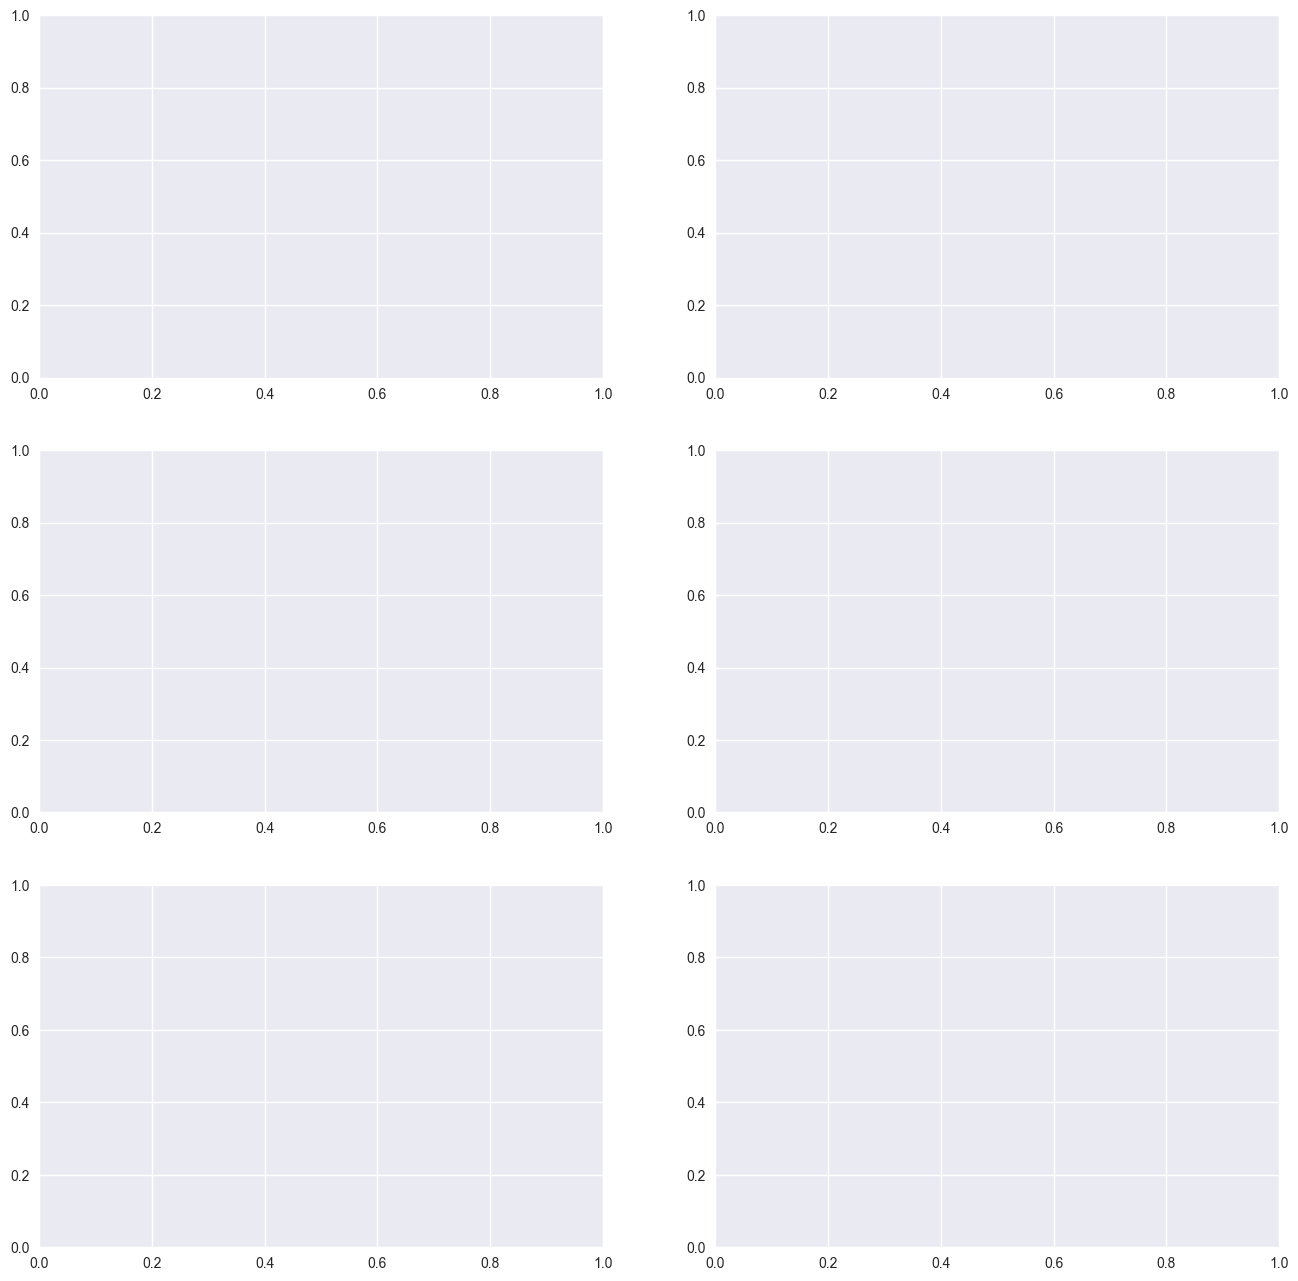

In [1559]:
# создадим сетку графиков, настроим параметры
# получим сетку 3x2; можем задать размер в условных единицах
# мы сразу же увидим нашу сетку
fig, axes = plt.subplots(3,2, figsize=(16,16))

In [1560]:
# добавим общий заголовок сетки
fig.suptitle('Самые лучшие графики', fontsize=16)

Text(0.5, 0.98, 'Самые лучшие графики')

Если после вызова подобных методов вы не хотите постоянно видеть ничего кроме графиков (в данном случае вывелась информация "Text...") - просто поставьте в самом конце ячейки ;

In [1561]:
fig.suptitle('Самые лучшие графики :)', fontsize=16);

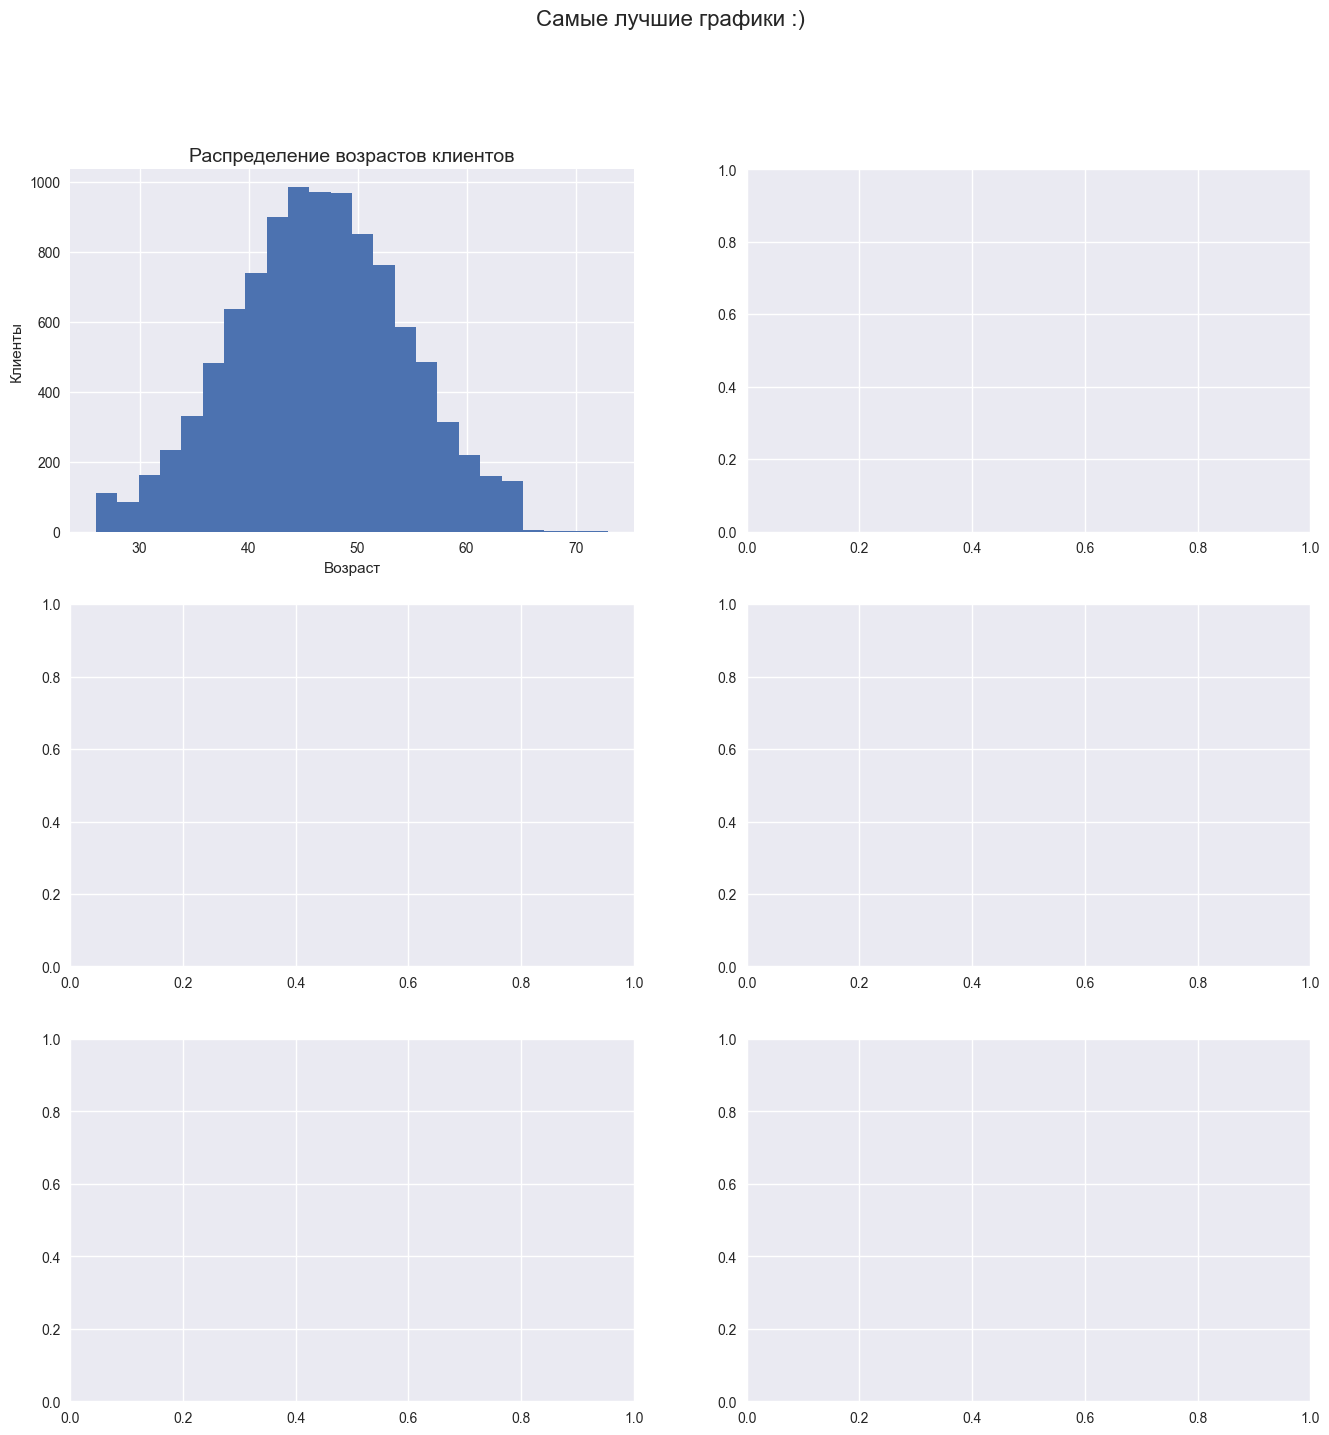

In [1562]:
# В первой ячейке сетки построим гистограмму распределения возрастов клиентов
axes[0,0].set_title('Распределение возрастов клиентов', fontsize=14)
axes[0,0].set_xlabel('Возраст');
axes[0,0].set_ylabel('Клиенты');
# у гистограммы можем настроить количество бинов (столбцов)
axes[0,0].hist(bank_data['Customer_Age'], bins=24);
fig

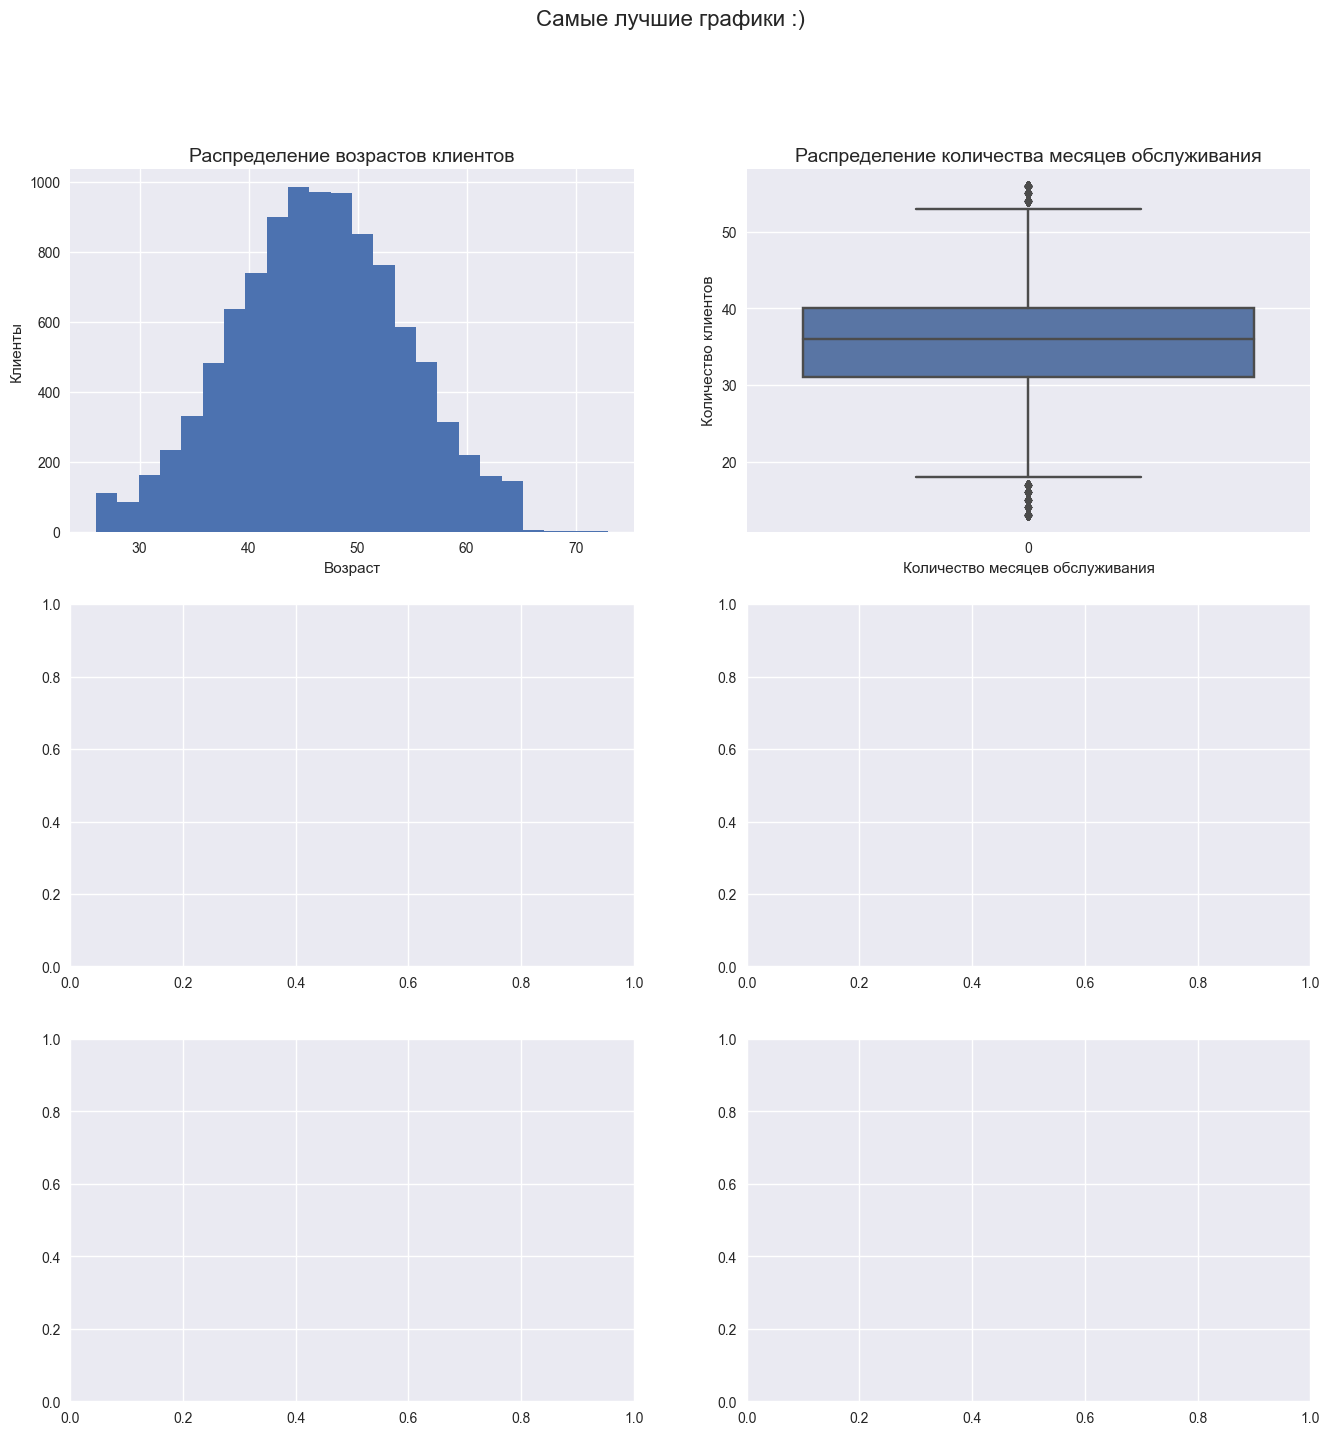

In [1563]:
# Во второй ячейке построим диаграмму "ящик с усами" для количества месяцев обслуживания
# эта диаграмма, как и гистрограмма, позволяет сделать выводы о распределении
axes[0,1].set_title('Распределение количества месяцев обслуживания', fontsize=14)
axes[0,1].set_xlabel('Количество месяцев обслуживания');
axes[0,1].set_ylabel('Количество клиентов');
# здесь воспользуемся seaborn
sns.boxplot(ax=axes[0,1], data=bank_data['Months_on_book'])
fig

In [1564]:
# на следующем графике давайте отобразим круговую диаграмму, показывающую распределение уровней образования
# воспользуемся numpy
labels, counts = np.unique(bank_data['Education_Level'], return_counts=True)
labels, counts

(array(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
        'Uneducated', 'Unknown'], dtype=object),
 array([1013,  451, 3128, 2013,  516, 1487, 1519], dtype=int64))

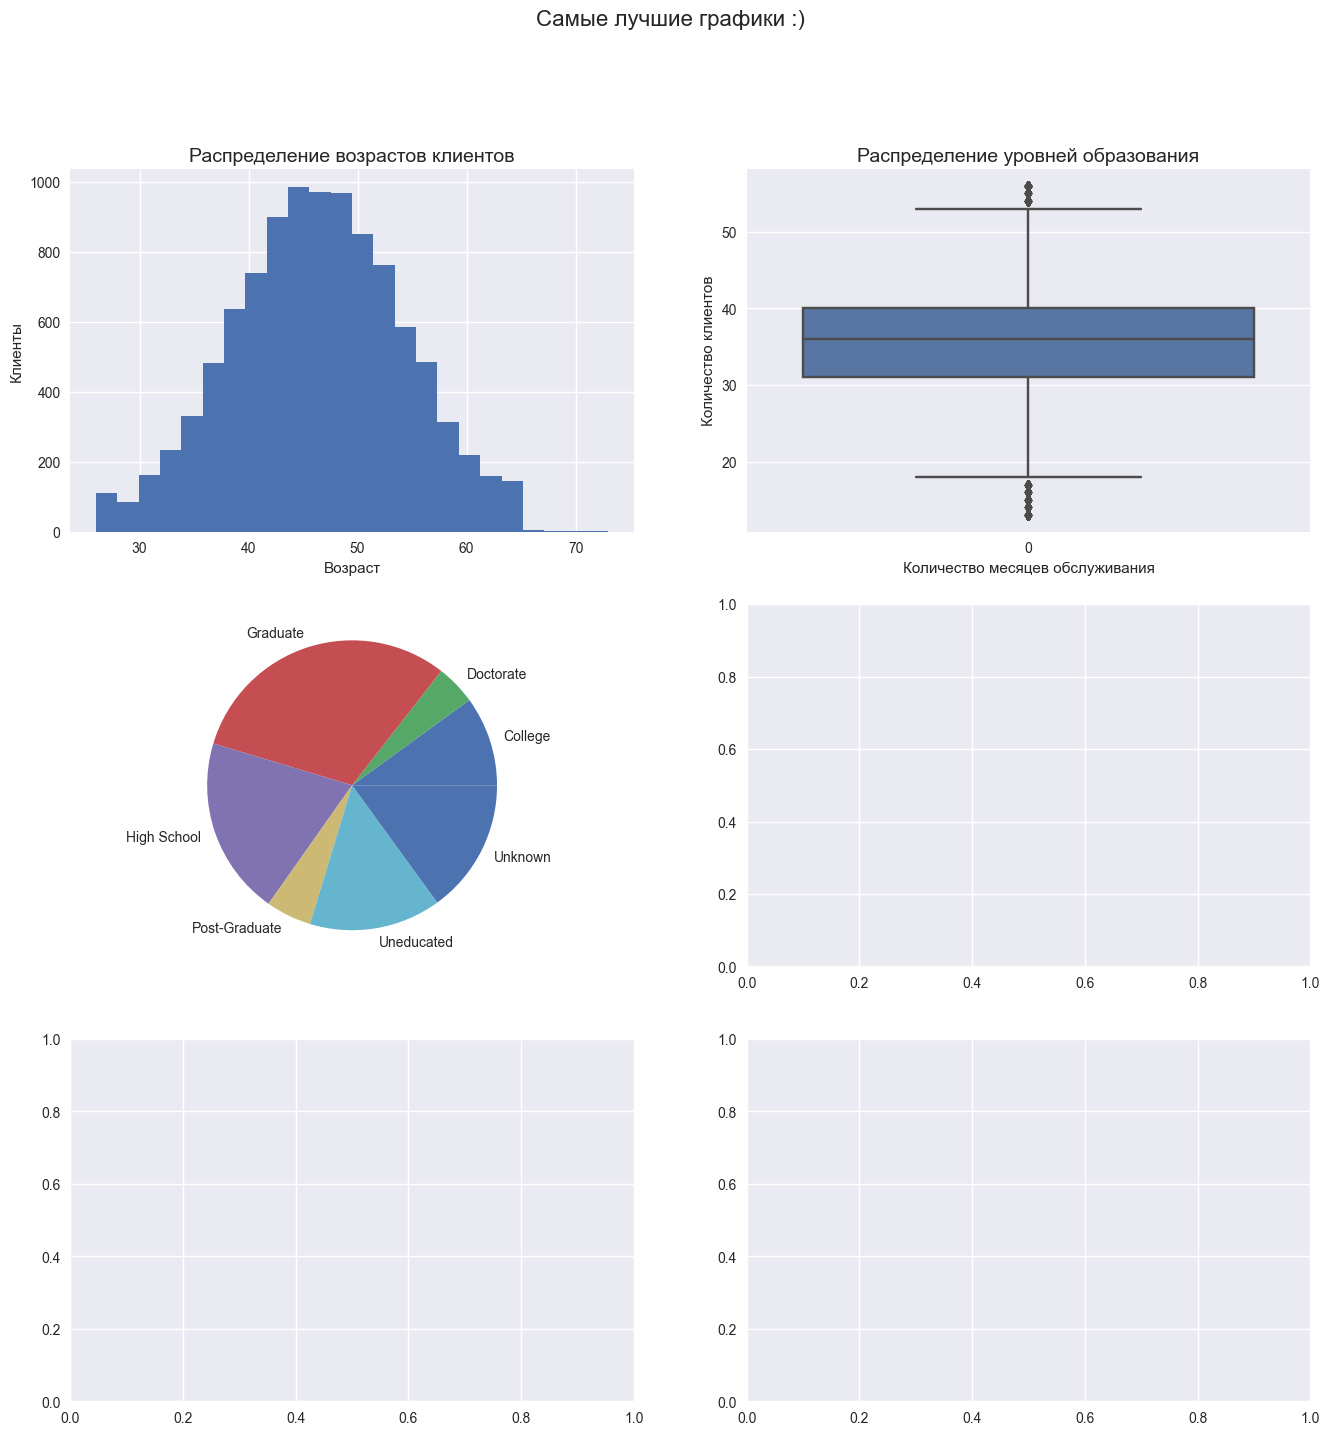

In [1565]:
axes[0,1].set_title('Распределение уровней образования', fontsize=14)
axes[1,0].pie(counts, labels=labels)
fig

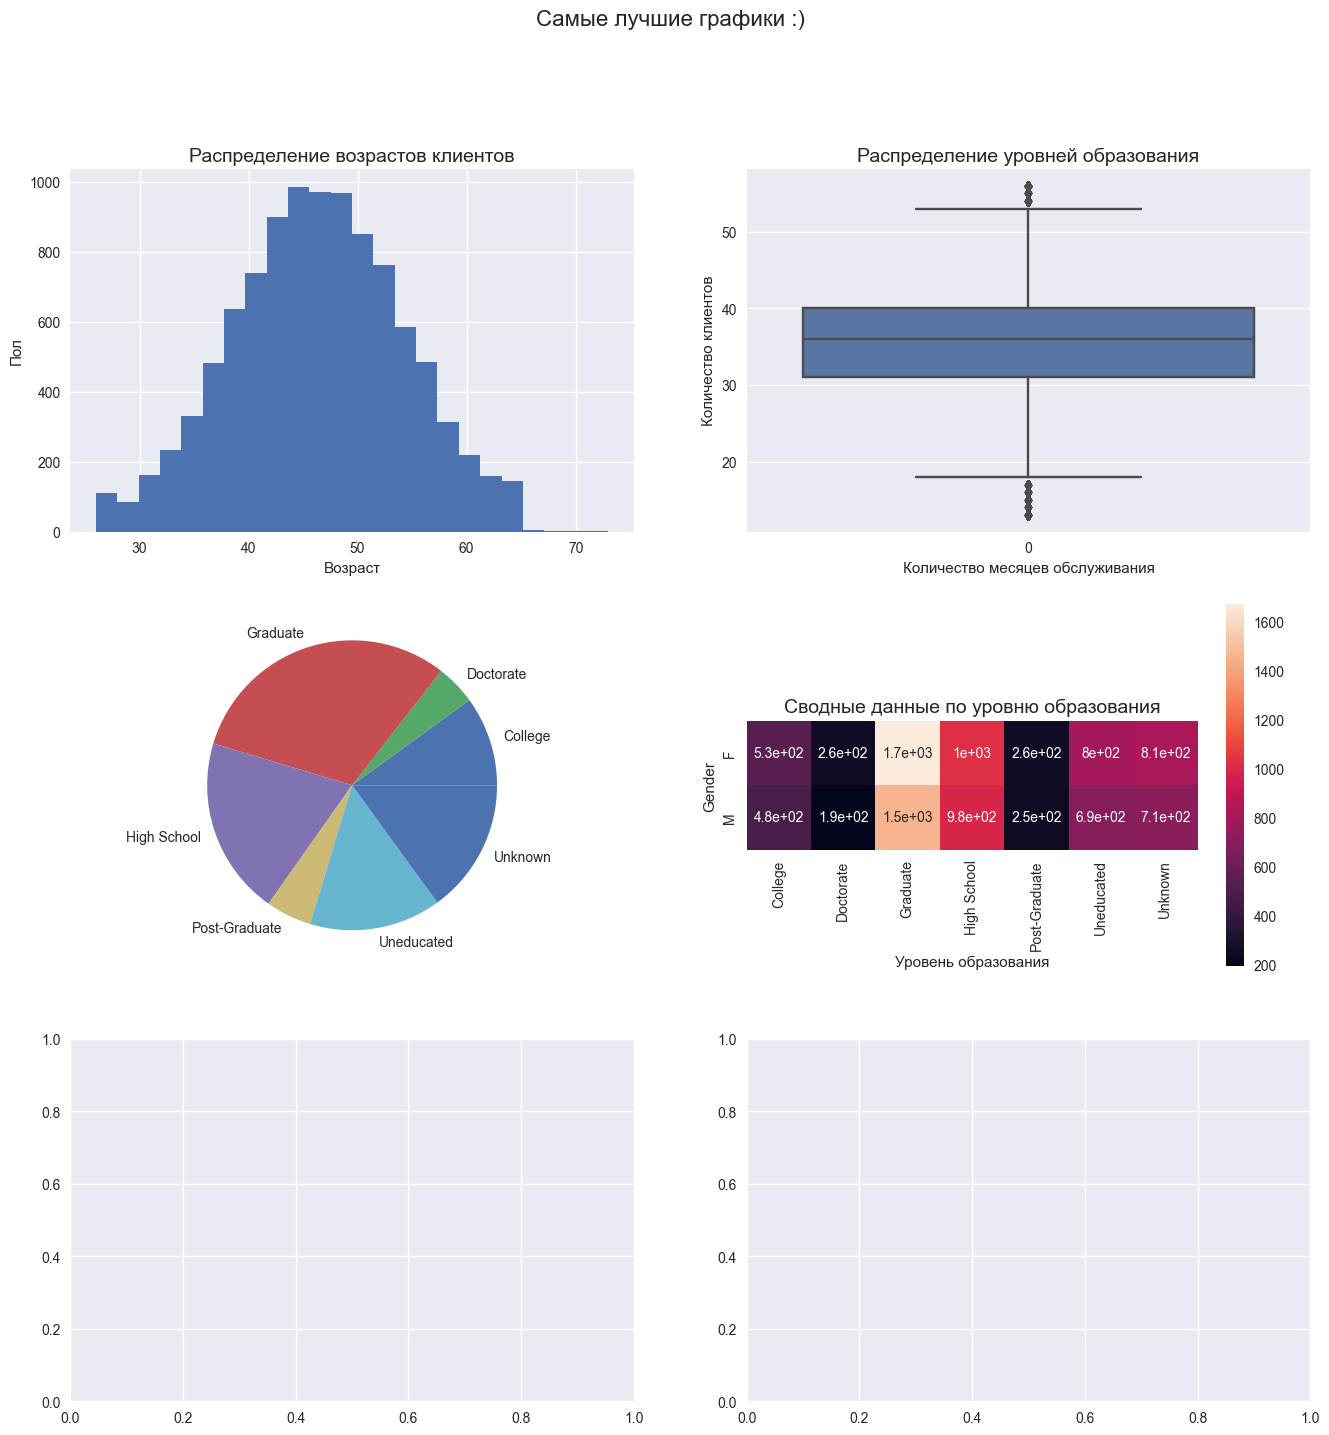

In [1566]:
# теперь вспомним про нашу свобдную таблицу pvt
# она также показывает распределение уровней образования, только с учетом пола
# визуализируем ее с помощью тепловой карты
axes[1,1].set_title('Сводные данные по уровню образования', fontsize=14)
sns.heatmap(ax=axes[1,1], data=pvt, annot=True, square=True)
axes[1,1].set_xlabel('Уровень образования');
axes[0,0].set_ylabel('Пол');
fig

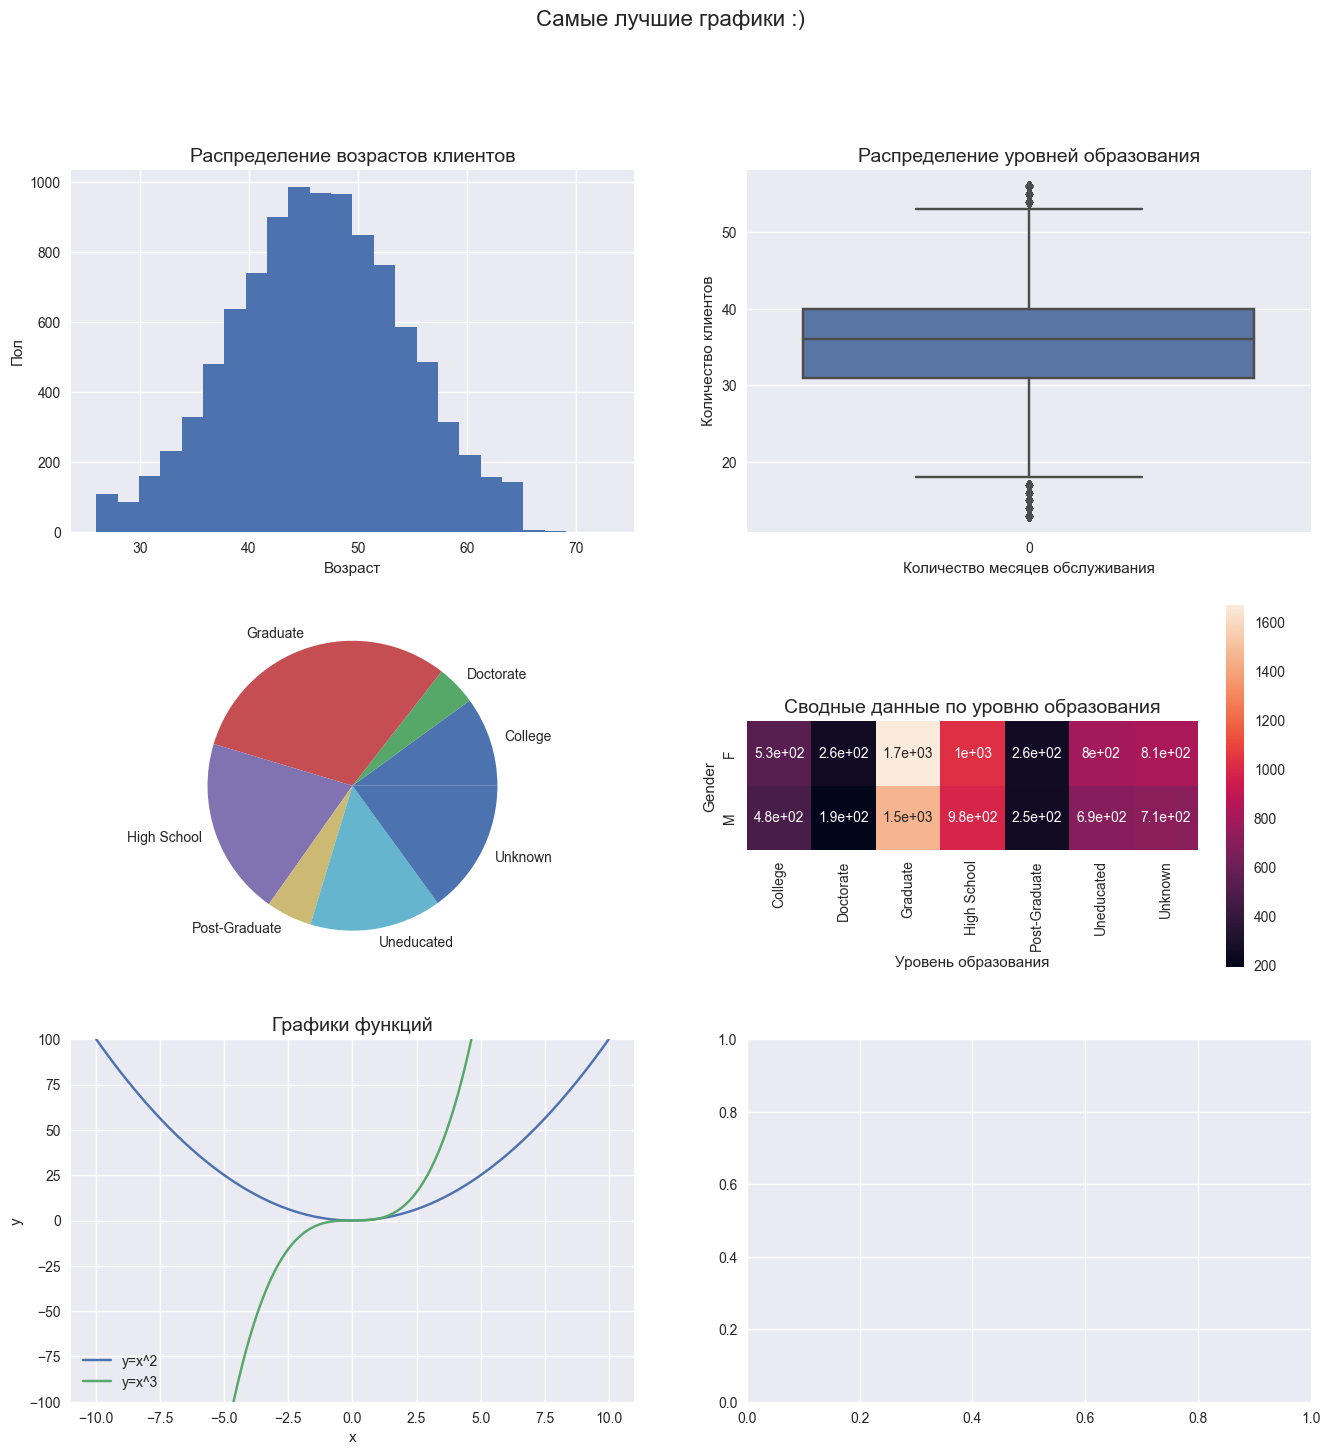

In [1567]:
# давайте отвлечемся от нашего датасета, чтобы построить еще два графика
# первый будет - линейный график
# давайте построим для примера параболу
# сначала нагенерируем точки в диапазоне с помощью numpy
x = np.linspace(-10, 10, 500)
# посчитаем значение функции
y1 = x ** 2
y2 = x ** 3
# и еще одну функцию посчитаем
# нарисуем график
axes[2,0].set_title('Графики функций', fontsize=14)
axes[2,0].set_xlabel('x');
axes[2,0].set_ylabel('y');
axes[2,0].plot(x, y1, label='y=x^2')
axes[2,0].plot(x, y2, label='y=x^3')
axes[2,0].set_ylim((-100, 100));
axes[2,0].legend()
fig

In [1568]:
# напоследок давайте последний график сделаем в 3D - отрисуем поверхность
# для начала поменяем проекцию графика на 3D
# получим отдельный объект осей для него
# 326 это значит сетка 3x2 и мы берем 6 график (считая слева направо и сверху вниз от 1)
axes[2,1].remove()
ax3D = fig.add_subplot(326, projection='3d')

In [1569]:
# визуализируем поверхность
X = np.linspace(-10, 10, 500)
Y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + Y**2)

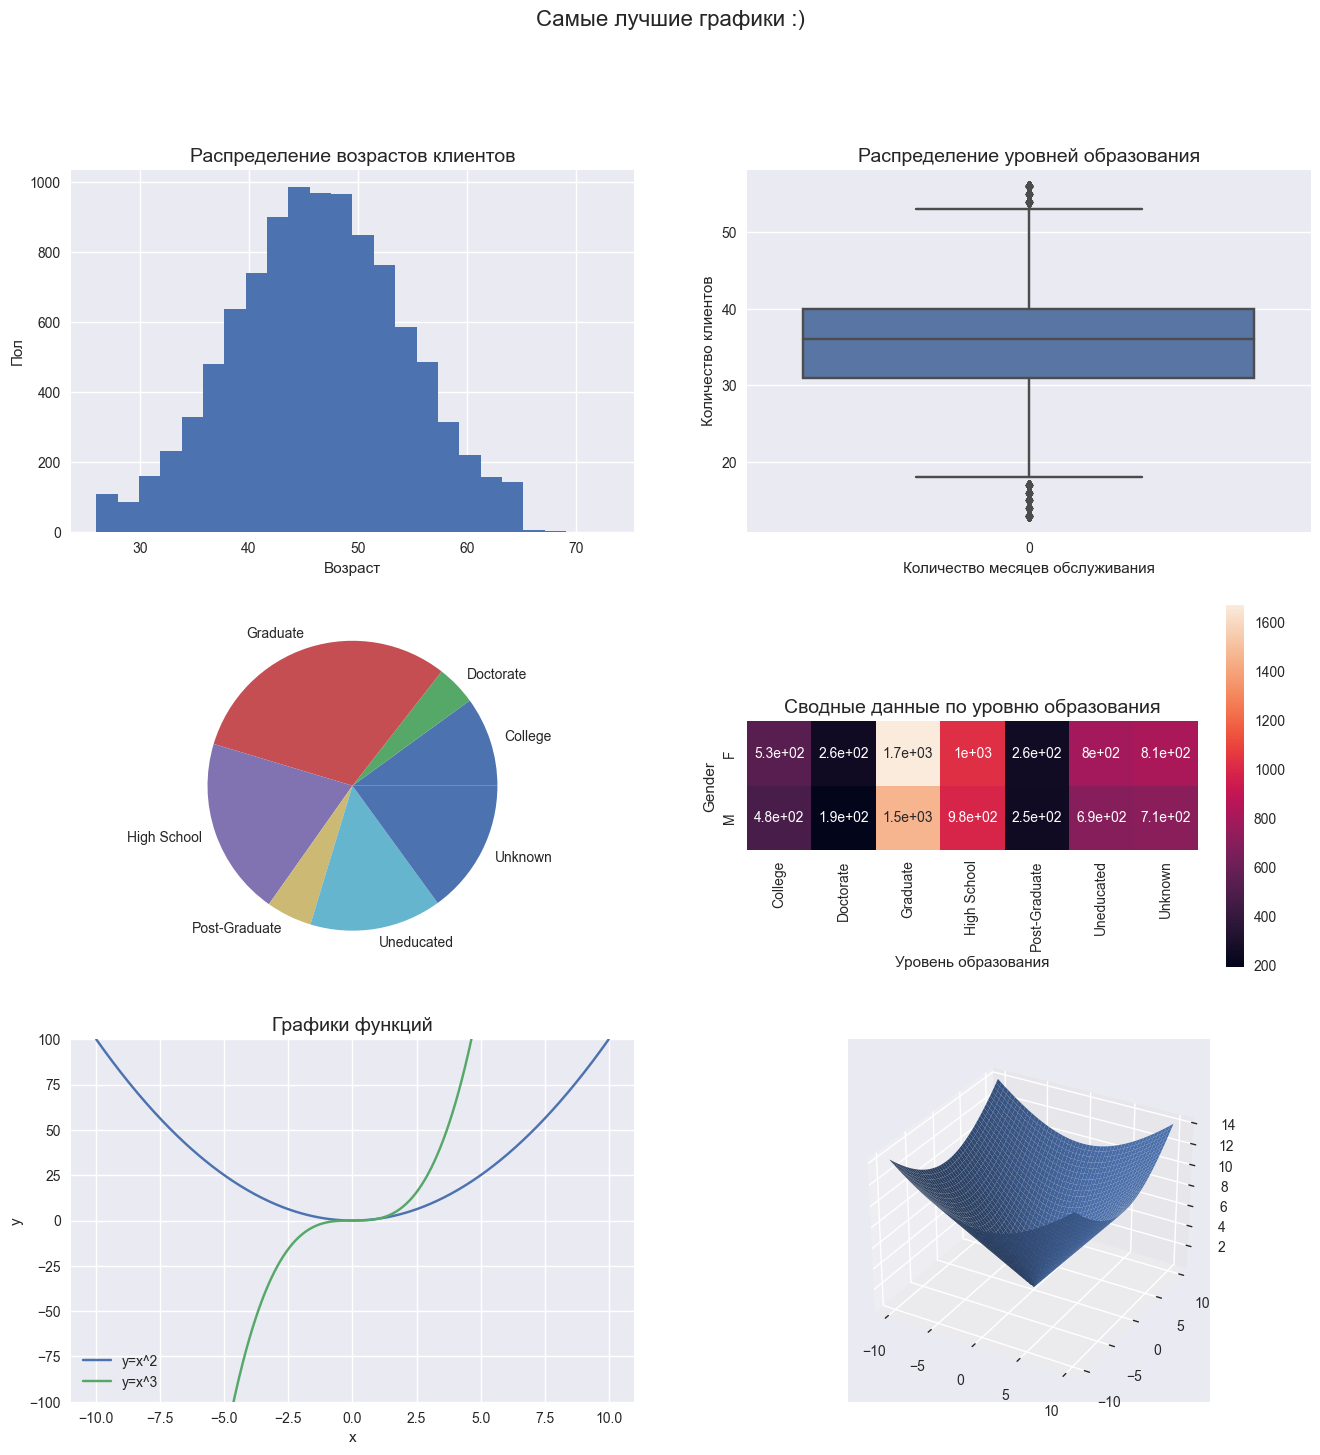

In [1570]:
ax3D.plot_surface(X, Y, Z)
fig

Все, что мы посмотрели - это база по визуализациям. Вы всегда можете подробнее изучить документацию используемых инструментов чтобы делать прекрасные картинки.

А мы, тем временем, вспомним, что нам осталось разобраться предобработкой банковского датасета. Займемся ей.

## Предобработка данных средствами pandas

Существует общая последовательность предварительной обработки данных:
- удалить ненужные столбцы (различные идентификаторы, вычисляемые столбцы и т. д.)
- если присутствуют столбцы, содержащие несколько данных в одном столбце (например, весь адрес в одной строке) - нам необходимо разделить данные по столбцам (можно использовать регулярные выражения)
- заполнить (или удалить) пропущенные значения в данных
- привести все категориальные данные к числовому типу (модели машинного обучения работают с векторами, состоящими из чисел).

In [1571]:
bank_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [1572]:
# удалим ненужные столбцы из датасета
bank_data.drop(['CLIENTNUM',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                axis='columns', inplace=True)
bank_data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [1573]:
# проверим наличие пропусков в данных
bank_data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [1574]:
# видим, что в данном датасете пропусков нет
# давайте создадим датасет, где они будут и посмотрим, как их заполнять
data = pd.DataFrame(columns=["Id", "Name", "Age", "Married", "Income"], data = [
    [1, "Miha", 12, 'Yes', 5678.87],
    [2, "Dima", None, 'Yes', 32899.87],
    [3, "Artem", 16, None, None],
    [4, "Bogdan", 16, 'No', 16366]
])
data

,Id,Name,Age,Married,Income
0,1,Miha,12.0,Yes,5678.87
1,2,Dima,NaN,Yes,32899.87
2,3,Artem,16.0,None,NaN
3,4,Bogdan,16.0,No,16366.00


In [1575]:
data.isnull().sum()

Id         0
Name       0
Age        1
Married    1
Income     1
dtype: int64

In [1576]:
# самый простой вариант - можно удалить строки, где встречаются пропуски
# на практике не рекомендуется, если мало данных
data.dropna()

,Id,Name,Age,Married,Income
0,1,Miha,12.0,Yes,5678.87
3,4,Bogdan,16.0,No,16366.00


Если мы хотим сохранить данные, то заполняем пропуски. Для эффективного заполнения пропусков нам нужно знать, данные какого типа содержатся в каждом столбце. Действуем обычно по следующему правилу:
- непрерывные числовые данные (если числа действительные, тип float) заполняем средним значением;
- дискретные числовые данные (целые числа) заполняем медианой;
- категориальные признаки заполняем модой (величина, которая встречается чаще всего среди значений столбца).

In [1577]:
data

,Id,Name,Age,Married,Income
0,1,Miha,12.0,Yes,5678.87
1,2,Dima,NaN,Yes,32899.87
2,3,Artem,16.0,None,NaN
3,4,Bogdan,16.0,No,16366.00


In [1578]:
# заполним пустое значение возраста (целое число)
# сразу преобразуем весь столбцец к целым числам
data["Age"] = data["Age"].fillna(data['Age'].median())
data["Age"].median()
data["Age"] = data["Age"].astype("int")
data

,Id,Name,Age,Married,Income
0,1,Miha,12,Yes,5678.87
1,2,Dima,16,Yes,32899.87
2,3,Artem,16,None,NaN
3,4,Bogdan,16,No,16366.00


In [1579]:
data["Married"].mode()

0    Yes
Name: Married, dtype: object

In [1580]:
# заполним категориальную величину
data["Married"] = data["Married"].fillna(data["Married"].mode())
data

,Id,Name,Age,Married,Income
0,1,Miha,12,Yes,5678.87
1,2,Dima,16,Yes,32899.87
2,3,Artem,16,NaN,NaN
3,4,Bogdan,16,No,16366.00


In [1581]:
# заполним доход (действительное число)
data["Income"] = data["Income"].fillna(data["Income"].mean())
data

,Id,Name,Age,Married,Income
0,1,Miha,12,Yes,5678.870000
1,2,Dima,16,Yes,32899.870000
2,3,Artem,16,NaN,18314.913333
3,4,Bogdan,16,No,16366.000000


Вернемся к банковскому датасету. Нам осталось привести все категориальные данные к числовому типу.

In [1582]:
bank_data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Категориальными данными в данном случае являются:
- Attrition_Flag;
- Gender;
- Education_Level;
- Marital_Status;
- Income_Category;
- Card_Category.

Существует два основных способа преобразования таких данных в числа:
- Label Encoding (кодирование с помощью словаря, ключами которого являются все возможные значения категориального признака, а значениями - числа от 0 до n не включая, n - количество значений категориального признака);
- One-Hot Encoding (добавление новых столбцов для каждого значения категориального признака; новый столбец состоит из нулей и единиц; 1 - если изначально у объекта было данное значение категориального признака; 0 - иначе).

Первый способ удобно реализуется с помощью LabelEncoder из пакета sklearn, но в этой части спринта мы его не используем. Мы реализуем этот способ на примере создания собственного словаря и использования метода map() из pandas.

In [1583]:
# закодируем целевой признак (его в будущем будем предсказывать)
np.unique(bank_data['Attrition_Flag'])

array(['Attrited Customer', 'Existing Customer'], dtype=object)

In [1584]:
map_dict = {
    'Attrited Customer': 0,
    'Existing Customer': 1
}
bank_data['Attrition_Flag'] = bank_data['Attrition_Flag'].map(map_dict)
bank_data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [1585]:
# а теперь для всех оставшихся признаков применим one-hot кодирование, используем метод get_dummies() из pandas
bank_data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [1586]:
cat_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
prefixes = ['g', 'edu', 'mar', 'inc', 'card']

In [1587]:
bank_data = pd.get_dummies(columns=cat_features, data=bank_data, prefix=prefixes)
bank_data

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,inc_$120K +,inc_$40K - $60K,inc_$60K - $80K,inc_$80K - $120K,inc_Less than $40K,inc_Unknown,card_Blue,card_Gold,card_Platinum,card_Silver
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,1,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,1,0,0,0,0,1,0,0,0
10123,0,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,1,0,0,0,0,1,0,0,0
10124,0,44,1,36,5,3,4,5409.0,0,5409.0,...,0,0,0,0,1,0,1,0,0,0
10125,0,30,2,36,4,3,3,5281.0,0,5281.0,...,0,1,0,0,0,0,1,0,0,0


In [1588]:
bank_data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'g_F',
       'g_M', 'edu_College', 'edu_Doctorate', 'edu_Graduate',
       'edu_High School', 'edu_Post-Graduate', 'edu_Uneducated', 'edu_Unknown',
       'mar_Divorced', 'mar_Married', 'mar_Single', 'mar_Unknown',
       'inc_$120K +', 'inc_$40K - $60K', 'inc_$60K - $80K', 'inc_$80K - $120K',
       'inc_Less than $40K', 'inc_Unknown', 'card_Blue', 'card_Gold',
       'card_Platinum', 'card_Silver'],
      dtype='object')

In [1589]:
# сохраним предобработанный датасет
bank_data.to_csv('data/bank_churners_preprocessed.csv', index=False)

На этом завершается первая часть спринта по машинному обучению. Мы достаточно подробно разобрали важную часть, посвященную анализу и подготовке наших данных для обучения. Очень многие гипотезы (выбор способа заполнения пропущенных значений, способа кодирования категориальных признаков и т. д.) проверяются уже на этапе моделирования. Мы строим разные модели и смотрим, как меняется их качество в зависимости от данных и параметров самих моделей.

В следующей части спринта мы научимся решать задачи обучения с учителем (классификация и регрессия) с помощью моделей из фреймворка sklearn и с помощью глубоких нейронных сетей (строить их мы будем используя API Keras фреймворка Tensorflow).